<a href="https://colab.research.google.com/github/GANYMEDEBANK/3-1-PROJECT---Breast-Cancer/blob/main/HISTOLOGY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import keras
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
%matplotlib inline

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nazmulislam1803029","key":"b1c362bc793175237021a8fffe911213"}'}

In [ ]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/breast-histopathology-images
!unzip breast-histopathology-images.zip

In [ ]:
imagePatches = glob('/content/**/*.png', recursive=True)

In [ ]:
for filename in imagePatches[23:27]:
    print(filename)

/content/9029/1/9029_idx5_x2601_y951_class1.png
/content/9029/1/9029_idx5_x2251_y851_class1.png
/content/9029/1/9029_idx5_x2251_y801_class1.png
/content/9029/1/9029_idx5_x2101_y751_class1.png


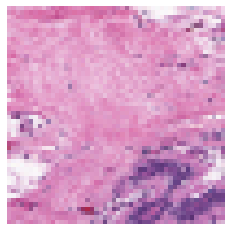

In [ ]:
image_name = "/content/10253/0/10253_idx5_x1001_y1001_class0.png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (50,50))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)

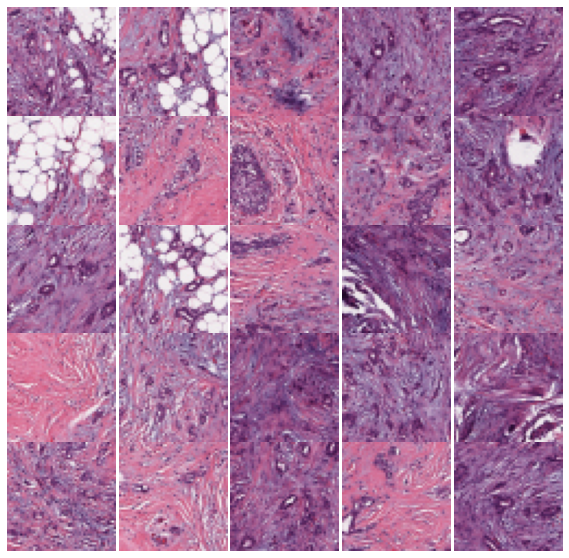

In [ ]:
SomeImages = imagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in SomeImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [ ]:
zeros = '*class0.png'
ones = '*class1.png'

class_zero = fnmatch.filter(imagePatches,zeros)
class_one = fnmatch.filter(imagePatches,ones)

In [ ]:
def process_img():
    x = []
    y = []
    H = 50
    W = 50
    for img in imagePatches[0:30000]:
        raw_image = cv2.imread(img)
        #inter_cubic(varriable) refers resulting image type in lower reg
        x.append(cv2.resize(raw_image, (W,H), interpolation=cv2.INTER_CUBIC))
        if img in class_zero:
            y.append(0)
        elif img in class_one:
            y.append(1)
        else:
            return
    return x,y

In [ ]:
X,Y = process_img()
df = pd.DataFrame()

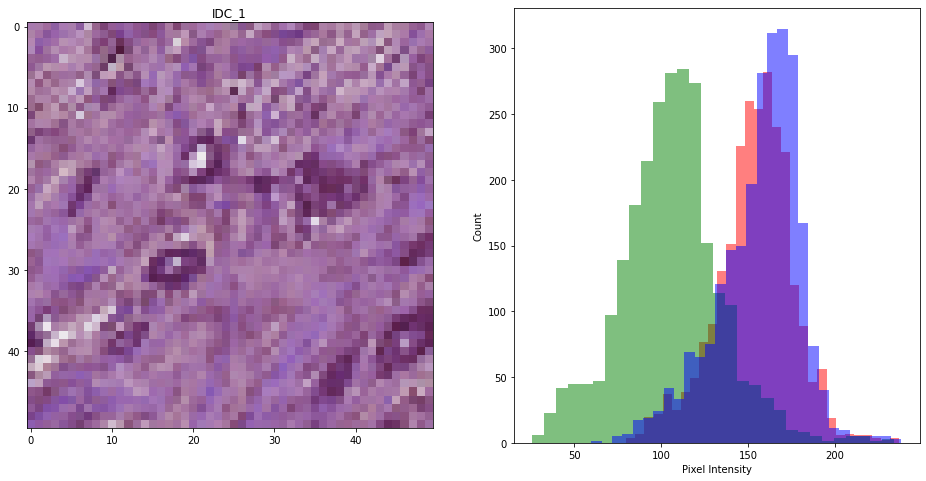

In [ ]:
def histo_plot(im):
    plt.figure(figsize =  (16,8))
    plt.subplot(1,2,1)
    plt.imshow(im)
    plt.title('IDC_1' if Y[1] else 'IDC_0')
    his = plt.subplot(1,2,2)
    his.set_ylabel('Count')
    his.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(im[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(im[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(im[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
histo_plot(X[10])

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
Y.shape

(30000,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


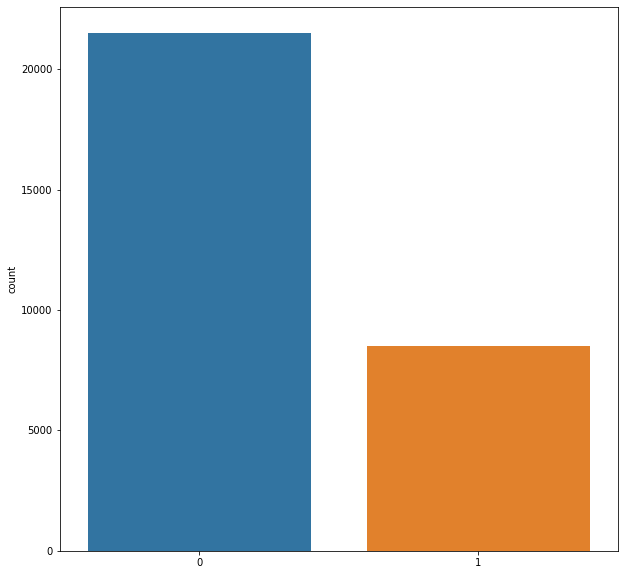

In [ ]:
sns.countplot(Y)

In [ ]:
#print(X.shape)
print(Y.shape)

(30000,)


In [ ]:
X = X/255.0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(24000, 50, 50, 3)
(6000, 50, 50, 3)
(24000,)
(6000,)


In [ ]:
model = Sequential()
model.add(Conv2D(32,(2,2),padding='same',  activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(2,2),padding='same',  activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(2,2),padding='same',  activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(2,2),padding='same',  activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(2,2),padding='same',  activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

model.add(Dense(2,activation='softmax'))


In [ ]:
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'] )

In [ ]:
history = model.fit(X_train, Y_train, epochs = 20,
                    validation_data = (X_test, Y_test),batch_size=256
                    )

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


94/94 [==============================] - 60s 628ms/step - loss: 0.5348 - accuracy: 0.7396 - val_loss: 0.4369 - val_accuracy: 0.8170
Epoch 2/20
94/94 [==============================] - 52s 557ms/step - loss: 0.4091 - accuracy: 0.8280 - val_loss: 0.3735 - val_accuracy: 0.8402
Epoch 3/20
94/94 [==============================] - 55s 585ms/step - loss: 0.3881 - accuracy: 0.8339 - val_loss: 0.3649 - val_accuracy: 0.8455
Epoch 4/20
94/94 [==============================] - 52s 551ms/step - loss: 0.3705 - accuracy: 0.8421 - val_loss: 0.3625 - val_accuracy: 0.8430
Epoch 5/20
94/94 [==============================] - 52s 550ms/step - loss: 0.3593 - accuracy: 0.8445 - val_loss: 0.3480 - val_accuracy: 0.8545
Epoch 6/20
94/94 [==============================] - 53s 569ms/step - loss: 0.3611 - accuracy: 0.8449 - val_loss: 0.3647 - val_accuracy: 0.8515
Epoch 7/20
94/94 [==============================] - 51s 548ms/step - loss: 0.3447 - accuracy: 0.8534 - val_loss: 0.3353 - val_accuracy: 0.8592
Epoch 8/20

In [ ]:
Y_pred = model.predict(X_test)

188/188 [==============================] - 5s 28ms/step


In [ ]:
Y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[4154,  206],
       [ 433, 1207]])

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4360
           1       0.85      0.74      0.79      1640

    accuracy                           0.89      6000
   macro avg       0.88      0.84      0.86      6000
weighted avg       0.89      0.89      0.89      6000



In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 2)
print(test_acc)

188/188 - 4s - loss: 0.2648 - accuracy: 0.8935 - 4s/epoch - 21ms/step
0.8934999704360962


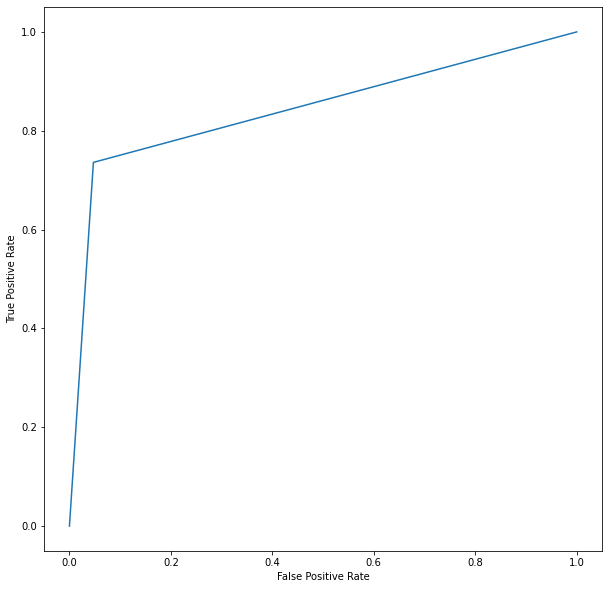

In [ ]:
fpr, tpr, _ = roc_curve(Y_test, Y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [ ]:
model.predict(X_test)

188/188 [==============================] - 5s 26ms/step


array([[0.9539663 , 0.04603358],
       [0.98628616, 0.01371386],
       [0.55438644, 0.44561353],
       ...,
       [0.02075724, 0.9792428 ],
       [0.9945334 , 0.0054666 ],
       [0.47637212, 0.5236277 ]], dtype=float32)